# Noise Analysis

The noise analysis of the $\Sigma\Delta$ filter differs from conventional analysis in two distinct ways. First, there is the inherent representation noise associated with the input and output bitstreams that are injected into the filter. Second, there are no fixed point coefficient multiplier products that need truncation. For the $\Sigma\Delta$ filter, noise is injected into the circuit that propagates to the output from three separate sources:

1. The representation noise of the input $\Sigma\Delta$ encoded bitstream to the filter output.

2. The additive representation noise of the output $\Sigma\Delta$ modulator to the filter output.

3. The coupling coefficient round-off quantization taking place after each discrete integrator.

There is no round-off quantization noise due to coefficient multiplies since no fixed point multipliers exist in the filter architecture; scaling coefficients are selected as power of two bitshifts. It is possible then to create third order or higher filters without coefficient multiply round-off quantization noise drowning out the signal information at each stage of the filter.

## $\Sigma\Delta$ Linearized Model

A simple model of the $\Sigma\Delta$ modulator can be derived by treating the one bit quantizer as an additive noise source. The dynamics of the $\Sigma\Delta$ modulator can be analyzed as a linear dynamic system with a white noise input. 

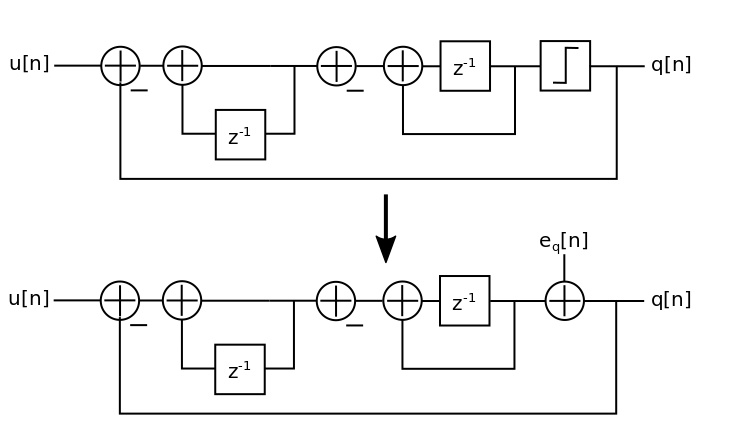

In [1]:
from IPython.display import Image
Image(filename='./Figures/SD2_linearization.png')

The linearized model allows one to modify the nonlinear state space dynamics of a modulator into the linear two input one output model:

$x^{+} =A_{\Sigma\Delta}x+B_{\Sigma\Delta}u+B_{e}e$

$q =C_{\Sigma\Delta}x+e$

where $e$ is the additive quantization noise input. Taking the z transform of the linear time domain state space model above, the two following transfer functions from $u$ to $q$ and from $e_{q}$ to $q$ can be found as

$STF\left(z\right)=\frac{Q\left(z\right)}{U\left(z\right)}=C_{\Sigma\Delta}\left(zI-A_{\Sigma\Delta}\right)^{-1}B_{\Sigma\Delta}$

$NTF\left(z\right)=\frac{Q\left(z\right)}{E\left(z\right)}=C_{\Sigma\Delta}\left(zI-A_{\Sigma\Delta}\right)^{-1}B_{e}+1$

The signal transfer function, or STF, is the transfer function from the input to the output of the sigma delta without the addition of quantization noise. The noise transfer function, or NTF, is the quantization noise input to the output of the sigma delta without the signal component. The overall output response of $\Sigma\Delta$ modulator can be found by

$Q\left(z\right)=STF\left(z\right)U\left(z\right)+NTF\left(z\right)E_{q}\left(z\right)$

which splits the signal component and representation noise component. The following assumption about the quantization noise are made with the estimated PSD:

1. The quantization error $e_{q}\left[n\right]$ is a wide sense stationary, white Gaussian random process.

2. The quantization error $e_{q}\left[n\right]$ is uncorrelated with itself and and the input sequence of the $\Sigma\Delta$ modulator. 

3. The probability-density function of the quantization error $\rho\left(e_{q}\right)$ is uniform over the entire quantization range $\left[-\frac{q}{2},\;\frac{q}{2}\right]$.

$\rho\left(e_{q}\right)=\begin{cases}
\frac{1}{q} & \left|e_{q}\right|\le\frac{q}{2}\\
0 & \left|e_{q}\right|>\frac{q}{2}
\end{cases}$

where q is the quantization step. 

While these assumptions are not always true, they do give a reasonable description of the actual quantization noise properties inherent in the nonlinear model for small and large amplitude signals with ample frequency content. From here, under these assumptions and the linear model, the PSD of the modulator output can be estimated.

Based on assumption that $\rho\left(e_{q}\right)$ is uniform over the quantization range $\left[-\frac{q}{2},\;\frac{q}{2}\right]$, we can find the mean of $e_{q}$ as 

$\bar{e}_{q}=E\left\{ e_{q}\right\} =\intop_{-\infty}^{\infty}e_{q}\rho\left(e_{q}\right)de_{q}=\frac{1}{q}\intop_{\frac{-q}{2}}^{\frac{q}{2}}e_{q}de_{q}=0$

and the variance of $e_{q}$ as

$\sigma_{e}^{2}=E\left\{ \left(e_{q}-\bar{e}_{q}\right)^{2}\right\} =\intop_{-\infty}^{\infty}e_{q}^{2}\rho\left(e_{q}\right)de_{q}=\frac{1}{q}\intop_{\frac{-q}{2}}^{\frac{q}{2}}e_{q}^{2}de_{q}=\frac{q^{2}}{12}$

Due to the assumption that the noise is white, the nominal quantization noise power $\sigma_{e}^{2}$ is spread out uniformly over the entire frequency space. The power spectral density of the additive quantization noise input is thus

$S_{e}\left(f\right)=\frac{\sigma_{e}^{2}}{f_{s}}$

and 

$S_{e}\left(f\right)=\frac{\sigma_{e}^{2}}{f_{s}}=\frac{q^{2}}{12f_{s}}=\frac{1}{3f_{s}}$

for a unipolar single bit quantizer (i.e. q=2). 

At this point, the filtering of $S_{e}\left(f\right)$ through the noise transfer function NTF(f) must be taken into account. The noise transfer function $NTF(f)$ shapes the power spectral density of the additive quantization noise which leads to a noise power over the signal band to be found by the equation

$\sigma_{\Sigma\Delta}^{2}=\intop_{-f_{b}}^{f_{b}}S_{e}\left(f\right)\left|NTF\left(f\right)\right|^{2}df$

[Understanding $\Delta\Sigma$ Data Converters](https://ieeexplore.ieee.org/book/5264508)

## Mathematical Background

The noise analysis of the $\Sigma\Delta$ filter consist of the input $\Sigma\Delta$ encoded bitstream,  the output $\Sigma\Delta$ modulator and the coupling coefficient round-off quantization taking place after each discrete integrator. There are no round-off quantization noise from coefficient multipliers since there are no fixed point multiplication. The scaling coefficients are all power of two bitshifts. That makes it possible to create third order or higher filters without coefficient multiply round-off quantization noise drowning out the signal information.

### Input $\Sigma\Delta$ Representation Noise Propagation

The input $\Sigma\Delta$ bit stream noise is filtered by the transfer function $\tilde{H}_{\Sigma\Delta}^{'}\left(\delta\right)$. The noise transfer function of the input modulator, $NTF_{\Sigma\Delta_{1}}\left(\delta\right)$, has quantizer noise with a spectral density of $\eta_{\Sigma\Delta_{1}}$. The output noise variance injected by the input $\Sigma\Delta$ modulator, $\sigma_{\Sigma\Delta_{1}}^{2}$, is given by

$\sigma_{\Sigma\Delta_{1}}^{2} =\intop_{-f_{B}}^{f_{B}}\eta_{\Sigma\Delta_{1}}\left[\tilde{H}_{\Sigma\Delta}^{'*}(f)NTF_{\Sigma\Delta_{1}}^{*}(f)NTF_{\Sigma\Delta_{1}}(f)\tilde{H}_{\Sigma\Delta}^{'}(f)\right]df +\Delta\left[\intop_{-f_{B}}^{f_{B}}\eta_{\Sigma\Delta_{1}}\left[S^{*}\left(f\right)NTF_{\Sigma\Delta_{1}}^{*}(f)NTF_{\Sigma\Delta_{1}}(f)S\left(f\right)\right]df\right]\Delta_{q}$

### Output $\Sigma\Delta$ Representation Noise Propagation

Representation noise from the output $\Sigma\Delta$ is injected at the quantizer noise input of the digital output modulator to the filter output. The transfer function, $E\left(\delta\right)$, from the output $\Sigma\Delta$ quantizer noise input to the output of the filter is

$E\left(\delta\right) = C_{\delta}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}\left[\begin{array}{cccc}
1 & 0 & \cdots & 0\end{array}\right]^{T}+1$

As a result of coefficient quantization, $E\left(\delta\right)$ will vary slightly from its ideal formulation. The sensitivity of $E\left(\delta\right)$ must be taken into account then when calculating the output noise variance estimate.

The sensitivity function $S^{E(\delta)}(\delta)$ of $E\left(\delta\right)$ can be defined as

$S^{E(\delta)}\left(\delta\right) =\left[\begin{array}{c}
S_{0}^{E(\delta)}(\delta)\\
S_{1}^{E(\delta)}(\delta)\\
S_{2}^{E(\delta)}(\delta)\\
\vdots\\
S_{N}^{E(\delta)}(\delta)
\end{array}\right]^{T}=\left[\begin{array}{c}
0\\
S_{\alpha_{1}}^{E(\delta)}(\delta)\\
S_{\alpha_{2}}^{E(\delta)}(\delta)\\
\vdots\\
S_{\alpha_{N}}^{E(\delta)}(\delta)
\end{array}\right]^{T}$

where

$\Delta\left|E\left(\delta\right)\right|\le\sum_{i=1}^{N}\Delta_{i}\left|S_{\alpha_{i}}^{E(\delta)}(\delta)\right|$

Let $NTF_{\Sigma\Delta_{2}}\left(\delta\right)$ be the noise transfer function of the output modulator where the quantizer noise has a spectral density of $\eta_{\Sigma\Delta_{2}}$. The output noise variance injected by the input $\Sigma\Delta$ modulator, $\sigma_{\Sigma\Delta_{1}}^{2}$, is given by

$\sigma_{\Sigma\Delta_{2}}^{2} = \intop_{-f_{B}}^{f_{B}}\eta_{\Sigma\Delta}\left[E^{*}\left(f\right)NTF_{\Sigma\Delta_{2}}^{*}\left(f\right)NTF_{\Sigma\Delta_{2}}\left(f\right)E\left(f\right)\right]df +\Delta_{q}^{T}\left[\intop_{-f_{B}}^{f_{B}}\eta_{\Sigma\Delta}\left[S^{E(\delta)*}\left(f\right)NTF_{\Sigma\Delta_{2}}^{*}(f)NTF_{\Sigma\Delta_{2}}(f)S^{E(\delta)}(\delta)\right]df\right]\Delta_{q}$

### Output Noise Propagation due to Scaling Coefficient Rounding

The third source of noise in the $\Sigma\Delta$ filter structure is from the rounding that occurs directly after the scaling coefficient bitshift implementations. Again, a rounding scheme is assumed in order to maintain a zero bias. It is also assumed that the rounding noise can be modeled as an additive white Gaussian source. Under that assumption, the spectral density of the rounding noise is

$\eta_{k_{i}}(f)=\frac{\sigma_{e}^{2}}{f_{s}}=\frac{\Delta_{qi}^{2}}{12\cdot f_{s}}$

To begin finding the total noise contribution from the scaling coefficient rounding, the transfer functions from the additive rounding noise inputs $e_{k_{1}}$ to the output y must be found. Taking note of the fact that the noise input for $k_{1}$ shares the same summation node as that of $\beta_{0}$,the transfer function $g_{0}{\left(\delta\right)}$ = $\frac{y\left(\delta\right)}{e_{k_{1}\left(\delta\right)}}$ can be found as

$g_{0}\left(\delta\right) =C_{\delta}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}\left[\begin{array}{cccc}
1 0 \cdots & 0\end{array}\right]^{T}+1$

The output noise variance $\sigma_{k_{1`}}^{2}$ contributed by the rounding of the $k_{1}$ scaling coefficient can then be found as

$\sigma_{k_{1`}}^{2}=\intop_{-f_{B}}^{f_{B}}\eta_{e_{k_{1}}}(f)\left|g_{0}\left(f\right)\right|^{2}df$

Similarly, the transfer function from $e_{k_{i}}$ to the output y shares the same summation node as $\tilde{\alpha}_{i}$ and $\tilde{\beta}_{i}$. The transfer function $g_{i}{\left(\delta\right)}=\frac{y\left(\delta\right)}{e_{k_{i}\left(\delta\right)}}$ can be found as

$g\left(\delta\right) =T_{s}^{T}T_{0}^{T}\left(\delta I-A_{\delta}^{T}\right)^{-1}C_{\delta}^{T}$

where the total output noise variance $\sigma_{k_{i}`}^{2}$ for the ith scaling coefficient rounding can written as

$\sigma_{k_{i}`}^{2}=\intop_{-f_{B}}^{f_{B}}\eta_{e_{k_{i}}}(f)\left|g_{i-1}\left(f\right)\right|^{2}df$

Taking all rounding contributions into consideration, the total output variance from scaling coefficient rounding $\sigma_{k}^{2}$ can be written as

$\sigma_{k}^{2}=\Delta_{q}^{T}\left[\intop_{-f_{B}}^{f_{B}}\left(\frac{1}{3f_{s}}\right)g_{k}^{*}\left(\delta\right)g_{k}\left(\delta\right)df\right]\Delta_{q}$

where

$g_{k}\left(\delta\right)=\left[\begin{array}{cccc}
g_{0}\left(\delta\right) g_{1}\left(\delta\right) \cdots g_{N-1}\left(\delta\right)\end{array}0\right]^{T}$

### Noise Floor in Integrator Sections due to $\Sigma\Delta$ Representation Noise

$\sigma_{total}^{2}=\sigma_{\Sigma\Delta1}^{2}+\sigma_{\Sigma\Delta2}^{2}+\sum_{k=1}^{n}\sigma_{k_{i}}^{2}$

The representation noise from the input and output $\Sigma\Delta$ modulators is an effect that propagates itself throughout the internal nodes of the $\Sigma\Delta$ filter architecture. Once a $\Sigma\Delta$ modulator architecture and OSR have been selected, the representation noise sets a fixed noise floor in all parts of the filter. Decreasing scaling coefficient round-off noise is therefore limited to the floor set by the representation noise of the input and feedback $\Sigma\Delta$ modulators. Reducing the quantization level $\Delta_{q_{i}}$ for the fixed point representation in the ith filter node will increase the overall size of the filter circuitry without any reduction in overall internal filter noise. It is therefore prudent to select $\Delta_{q_{i}}$ based on the condition

$\sigma_{k_{i}}^{2}\ge\sigma_{x_{i-1}\Sigma\Delta}^{2}$

where $\sigma_{k_{i}}^{2}$ is in band quantization noise variance due to scaling coefficient rounding and $\sigma_{x_{i-1}\Sigma\Delta}^{2}$ is the in band noise variance due to the input and feedback $\Sigma\Delta$ modulators at the ith integrator node. The in band quantization noise from the rounding that occurs after each integrator stage coupling coefficient is

$\sigma_{k_{i}}^{2}=\frac{\Delta_{q_{i}}^{2}}{12\cdot OSR}$

It is a fact that $\sigma_{x_{i-1}\Sigma\Delta}^{2}$ puts a limit onto how small one can make $\sigma_{k_{i}}^{2}$ through choosing the quantization step size $\Delta_{q_{i}}$ (i.e. $\sigma_{k_{i}}^{2}\nless\sigma_{x_{i-1}\Sigma\Delta}^{2}$). The bound on the size of $\Delta_{q}$ can be written as

$\Delta_{q_{i}}>\sqrt{12\cdot OSR\cdot\sigma_{x_{i}\Sigma\Delta}^{2}}$

To calculate $\sigma_{x_{i}\Sigma\Delta}^{2}$, the transfer function from the input and output $\Sigma\Delta$ modulator noise input to the state variables must be derived. For the input modulator to the ith integrator state, the transfer function is

$f_{x\Sigma\Delta_{1}}(\delta) = T_{s}^{-1}T_{0}^{-1}\left(\delta I-A_{\delta}\right)^{-1}B_{\delta}$

and the transfer function from the output modulator to the ith integrator state can be written as

$f_{x\Sigma\Delta_{2}}(\delta) = T_{s}^{-1}T_{0}^{-1}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}T_{s}K^{-1}\left[\begin{array}{cccc} 1 0 \cdots 0\end{array}\right]^{T}$

The noise variance at each node integrator stage due to the input and output modulators with respective noise transfer functions $NTF_{\Sigma\Delta_{1}}\left(f\right)$ and $NTF_{\Sigma\Delta_{2}}\left(f\right)$ can then be calculated as 

$\sigma_{x_{i}\Sigma\Delta_{1}}^{2}	=\eta_{e}(f)\int_{-f_{B}}^{f_{B}}\left|f_{x_{i}\Sigma\Delta_{1}}(f)NTF_{\Sigma\Delta_{1}}\left(f\right)\right|^{2}df$

$\sigma_{x_{i}\Sigma\Delta_{2}}^{2}	=\eta_{e}(f)\int_{-f_{B}}^{f_{B}}\left|f_{x_{i}\Sigma\Delta_{2}}(f)NTF_{\Sigma\Delta_{2}}\left(f\right)\right|^{2}df$

where

$\eta_{e}(f)=\frac{\sigma_{e}^{2}}{f_{s}}=\left(3f_{s}\right)^{-1}$

The total noise variance at each integrator stage due to the input and output $\Sigma\Delta$ representation noise is

$\sigma_{x_{i}\Sigma\Delta}^{2}=\sigma_{x_{i}\Sigma\Delta_{1}}^{2}+\sigma_{x_{i}\Sigma\Delta_{2}}^{2}$

where

$\sigma_{x\Sigma\Delta}^{2}=\left[\begin{array}{c}
\sigma_{x_{1}\Sigma\Delta}^{2}\\
\sigma_{x_{2}\Sigma\Delta}^{2}\\
\vdots\\
\sigma_{x_{n}\Sigma\Delta}^{2}
\end{array}\right]$

Having calculated $\sigma_{x\Sigma\Delta}^{2}$, the lower bound on the quantization steps of the filter will be

$\Delta_{q}>\sqrt{12\cdot OSR\cdot\sigma_{x\Sigma\Delta}^{2}}$

and can be used in determining the size of the fixed point signals in the filter architecture.

[$\Sigma\Delta$ Stream Computation](https://escholarship.org/uc/item/4f46n0h6)

In [2]:
# %load ./header.py
import numpy as np
from scipy import signal
from scipy import linalg
import control
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Math, display

import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

OSR = 256      # oversample ratio
fb = 22050     # nyquist
fs = OSR*2*fb  # sampling frequency
ts = 1/fs      # sampling period


In [3]:
%store -r
[Ad,Bd,Cd,Dd,k,k_inv,T0,Ts,f,ts,alpha,beta] = the_delta_filter

#### Input $\Sigma\Delta$ Representation Noise Propagation

$NTF_{\Sigma\Delta_{1}}\left(\delta\right)$ is the noise transfer function of the input modulator with quantizer noise spectral density of $\eta_{\Sigma\Delta_{1}}$

In [4]:
# % Sigma Delta Specifications (2nd Order)
n_sd = ts/3
NTF_num = [ts**2, 0, 0]
NTF_den = [ts**2, 2*ts, 1]
NTF = control.tf(NTF_num, NTF_den)
print(NTF)
NTF = control.ss(control.tf(NTF_num, NTF_den))


         7.846e-15 s^2
-------------------------------
7.846e-15 s^2 + 1.772e-07 s + 1



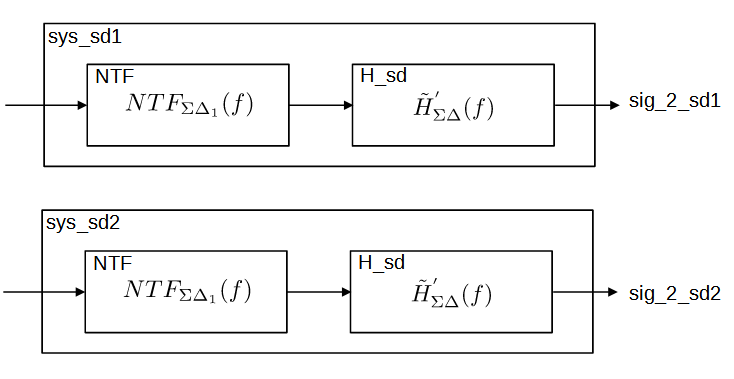

In [5]:
Image(filename='./Figures/sd_input_noise.PNG')

In [6]:
# % noise gain due to input sigma delta
H_sd = control.ss(Ad,Bd,Cd,Dd);
sys_sd1 = control.series(NTF, H_sd)
[g1,phz] = sdf.delta_bode(sys_sd1.A,sys_sd1.B,sys_sd1.C,sys_sd1.D,f,ts)
sig_2_sd1 = n_sd*(np.squeeze(g1)**2)

# % noise gain due to output sigma delta
A = linalg.solve(Ts, linalg.solve(T0, Ad))
z = np.zeros(Ad.shape[1])
z[0] = 1
B = linalg.solve(Ts, linalg.solve(T0, Ad-np.eye(Ad.shape[0])))
B = B @ T0 @ z.T
B = B.reshape((Ad.shape[0],1))
C = Cd @ T0 @ Ts
D = 1
E_sd = control.ss(A, B, C, D)
sys_sd2 = control.series(NTF, E_sd)
[g2,phz] = sdf.delta_bode(sys_sd2.A,sys_sd2.B,sys_sd2.C,sys_sd2.D,f,ts)
sig_2_sd2 = n_sd*(np.squeeze(g2)**2)

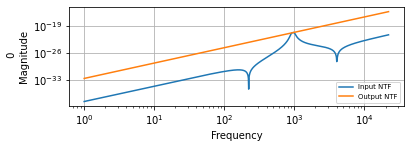

In [7]:
sdf.mag_before_after_plot(sig_2_sd1.reshape(1,sig_2_sd1.shape[0]),sig_2_sd2.reshape(1,sig_2_sd2.shape[0]),f,'',['Input NTF','Output NTF'])

The noise transfer functions of the  input modulator, $\sigma_{\Sigma\Delta_{1}}^{2}$ vs The noise transfer functions of the  output modulator, $\sigma_{\Sigma\Delta_{2}}^{2}$

$\sigma_{nom_{1}}^{2}=\eta_{\Sigma\Delta}\intop_{-f_{B}}^{f_{B}}\tilde{H}_{\Sigma\Delta}^{'*}(f)NTF_{\Sigma\Delta_{1}}^{*}(f)NTF_{\Sigma\Delta_{1}}(f)\tilde{H}_{\Sigma\Delta}^{'}(f)df$

In [8]:
sig_2_nom = np.trapz(np.squeeze(sig_2_sd1),f) + np.trapz(np.squeeze(sig_2_sd2),f)

#### Output $\Sigma\Delta$ Representation Noise Propagation

$g_{0}\left(\delta\right) = C_{\delta}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}\left[\begin{array}{cccc}
1 & 0 & \cdots & 0\end{array}\right]^{T}+1$

$g\left(\delta\right) = T_{s}^{T}T_{0}^{T}\left(\delta I-A_{\delta}^{T}\right)^{-1}C_{\delta}^{T}$

In [9]:
# %noise gain due to scaling coefficient multiplication roundoff
sys_g0 = E_sd.copy()
sys_g = control.ss(Ad.T,Cd.T,Ts.T @ T0.T, 0)
sys_g.C[-1,:] = 0
sys_g.D[-1,:] = 0
sys_k = sdf.ss_concat_outputs(sys_g0, sys_g)
[m1,phz] = sdf.delta_bode(sys_k.A,sys_k.B,sys_k.C,sys_k.D,f,ts)

$\sigma_{k}^{2}=\Delta_{q}^{T}\left[\intop_{-f_{B}}^{f_{B}}\left(\frac{1}{3f_{s}}\right)g_{k}^{*}\left(\delta\right)g_{k}\left(\delta\right)df\right]\Delta_{q}$

In [10]:
H = np.diag(((2*ts)/3)*np.trapz(np.squeeze(m1**2),f))

#### Noise Floor in Integrator Sections due to $\Sigma\Delta$ Representation Noise

$f_{x\Sigma\Delta_{1}}(\delta) = T_{s}^{-1}T_{0}^{-1}\left(\delta I-A_{\delta}\right)^{-1}B_{\delta}$

In [11]:
# %noise gain from input sigma delta to integrators
C = linalg.solve(Ts, linalg.solve(T0, np.eye(Ad.shape[0])))
C = k_inv @ C
sys_x_sd1 = control.ss(Ad,Bd,C,0)
sys_x_sd1 = control.series(NTF, sys_x_sd1)
[m_sys_x_sd1,phz] = sdf.delta_bode(sys_x_sd1.A,sys_x_sd1.B,sys_x_sd1.C,sys_x_sd1.D,f,ts)

$f_{x\Sigma\Delta_{2}}(\delta) = T_{s}^{-1}T_{0}^{-1}\left(\delta I-A_{\delta}\right)^{-1}A_{\delta}T_{0}T_{s}K^{-1}\left[\begin{array}{cccc}
1 0 \cdots 0\end{array}\right]^{T}$

In [12]:
# %noise gain from output sigma delta to integrators
z = np.zeros(Ad.shape[1])
z[0] = 1
B = Ad @ T0 @ Ts @ z.T
B = B.reshape((Ad.shape[0],1))
C = linalg.solve(Ts, linalg.solve(T0, np.eye(Ad.shape[0])))
C = k_inv @ C
sys_x_sd2 = control.series(NTF, control.ss(Ad, B, C, 0))
[m_sys_x_sd2,phz] = sdf.delta_bode(sys_x_sd2.A,sys_x_sd2.B,sys_x_sd2.C,sys_x_sd2.D,f,ts)

$\sigma_{x_{i}\Sigma\Delta_{1}}^{2}=\eta_{e}(f)\int_{-f_{B}}^{f_{B}}\left|f_{x_{i}\Sigma\Delta_{1}}(f)NTF_{\Sigma\Delta_{1}}\left(f\right)\right|^{2}df$

$\sigma_{x_{i}\Sigma\Delta_{2}}^{2}=\eta_{e}(f)\int_{-f_{B}}^{f_{B}}\left|f_{x_{i}\Sigma\Delta_{2}}(f)NTF_{\Sigma\Delta_{2}}\left(f\right)\right|^{2}df$

In [13]:
sig_2_x_sd1 = n_sd*(np.squeeze(m_sys_x_sd1)**2)
sig_2_x_sd2 = n_sd*(np.squeeze(m_sys_x_sd2)**2)

$\sigma_{x_{i}\Sigma\Delta}^{2}=\sigma_{x_{i}\Sigma\Delta_{1}}^{2}+\sigma_{x_{i}\Sigma\Delta_{2}}^{2}$

where

$\sigma_{x\Sigma\Delta}^{2}=\left[\begin{array}{c}
\sigma_{x_{1}\Sigma\Delta}^{2}\\
\sigma_{x_{2}\Sigma\Delta}^{2}\\
\vdots\\
\sigma_{x_{n}\Sigma\Delta}^{2}
\end{array}\right]$

In [14]:
# % total SD output noise 
sig_2_x_sd = sig_2_x_sd1 + sig_2_x_sd2

<IPython.core.display.Math object>

2.9533340057457332e-12

[[1.30202429e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.90992733e-10 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.29092498e-10 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.81457588e-10
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


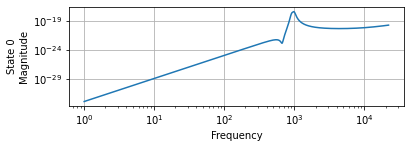

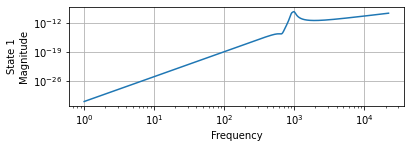

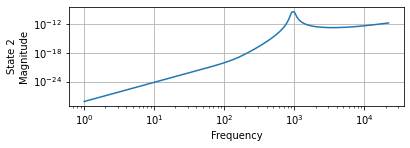

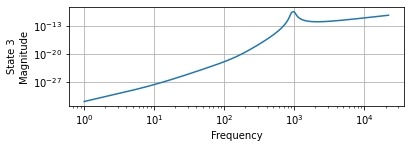

In [16]:
display(Math(r'\\sigma_{nom_{1}}^{2} ='))
print(str(sig_2_nom) + '\n')
print(H)
sdf.mag_states_plot(sig_2_x_sd,f,'State')

The total noise from each state node

In [17]:
the_noise = [sig_2_nom, sig_2_x_sd, H]
%store the_noise

Stored 'the_noise' (list)


Goto the next step - [Filter Bitwidth Optimization](./5_bitwidth_opt.ipynb)